In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from helperfun import plot_decision_boundary

2024-06-26 14:35:42.157392: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-26 14:35:42.157807: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-26 14:35:42.160262: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-26 14:35:42.194668: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-26 14:35:42.848976: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

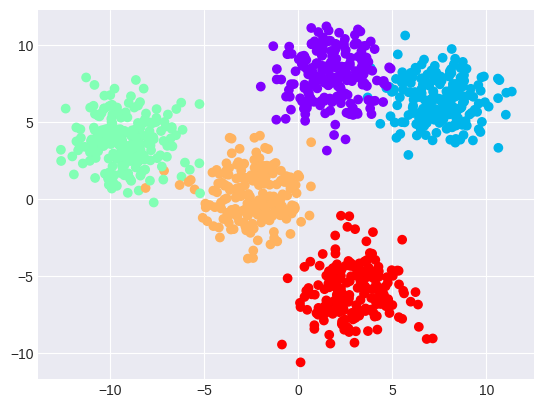

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X, y = make_blobs(n_samples=1000, centers=5, cluster_std=1.5, random_state=20)

plt.style.use("seaborn-v0_8-darkgrid")
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap="rainbow")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

In [3]:
blobs_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.sigmoid)
])

blobs_model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

blobs_model.fit(X_train, y_train, epochs=50, verbose=0)

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step


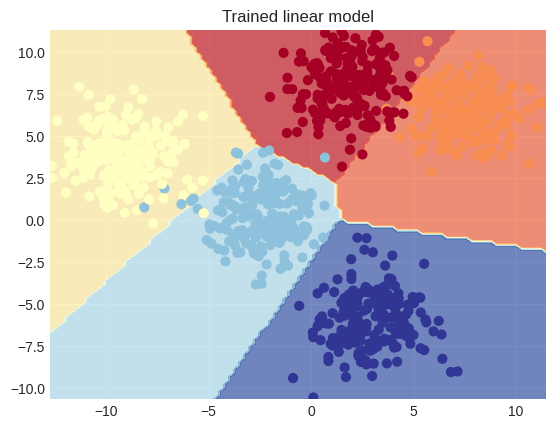

In [4]:
plt.title("Trained linear model")
plot_decision_boundary(blobs_model, X, y)